In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
fraud_df = pd.read_csv(r"C:\Users\jkk\OneDrive\Desktop\fraud-detection\data\raw\Fraud_Data.csv")


In [3]:
# Quick look
fraud_df.head()
fraud_df.info()
fraud_df.describe()
fraud_df.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129146 entries, 0 to 129145
Data columns (total 18 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   user_id                 129146 non-null  int64  
 1   signup_time             129146 non-null  object 
 2   purchase_time           129146 non-null  object 
 3   purchase_value          129146 non-null  int64  
 4   device_id               129146 non-null  object 
 5   source                  129146 non-null  object 
 6   browser                 129146 non-null  object 
 7   sex                     129146 non-null  object 
 8   age                     129146 non-null  int64  
 9   ip_address              129146 non-null  int64  
 10  class                   129146 non-null  int64  
 11  lower_bound_ip_address  129146 non-null  float64
 12  upper_bound_ip_address  129146 non-null  float64
 13  country                 129146 non-null  object 
 14  time_since_signup   

Index(['user_id', 'signup_time', 'purchase_time', 'purchase_value',
       'device_id', 'source', 'browser', 'sex', 'age', 'ip_address', 'class',
       'lower_bound_ip_address', 'upper_bound_ip_address', 'country',
       'time_since_signup', 'hour_of_day', 'day_of_week',
       'transactions_per_user'],
      dtype='object')

In [4]:
missing = fraud_df.isnull().sum()
print("Missing values:\n", missing)

Missing values:
 user_id                   0
signup_time               0
purchase_time             0
purchase_value            0
device_id                 0
source                    0
browser                   0
sex                       0
age                       0
ip_address                0
class                     0
lower_bound_ip_address    0
upper_bound_ip_address    0
country                   0
time_since_signup         0
hour_of_day               0
day_of_week               0
transactions_per_user     0
dtype: int64


In [5]:
duplicates = fraud_df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")


Number of duplicate rows: 0


class
0    116878
1     12268
Name: count, dtype: int64


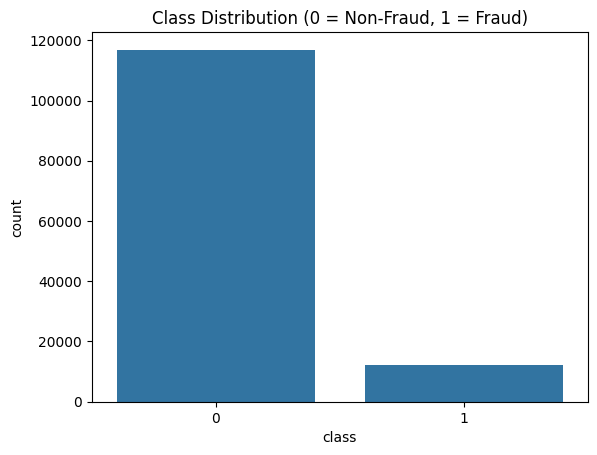

In [6]:
class_counts = fraud_df['class'].value_counts()
print(class_counts)
sns.countplot(x='class', data=fraud_df)
plt.title("Class Distribution (0 = Non-Fraud, 1 = Fraud)")
plt.show()

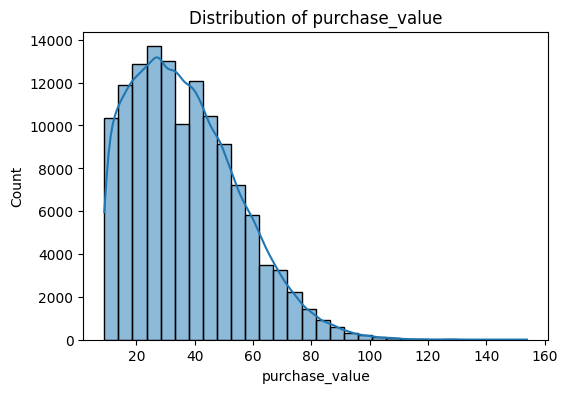

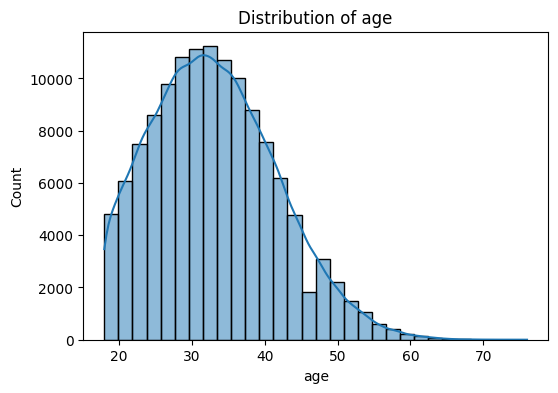

In [7]:
num_cols = ['purchase_value', 'age']
for col in num_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(fraud_df[col], bins=30, kde=True)
    plt.title(f"Distribution of {col}")
    plt.show()

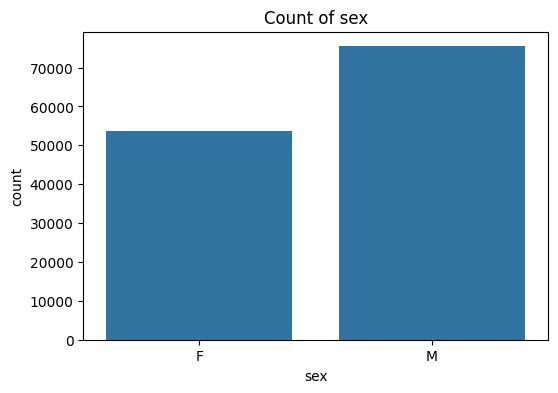

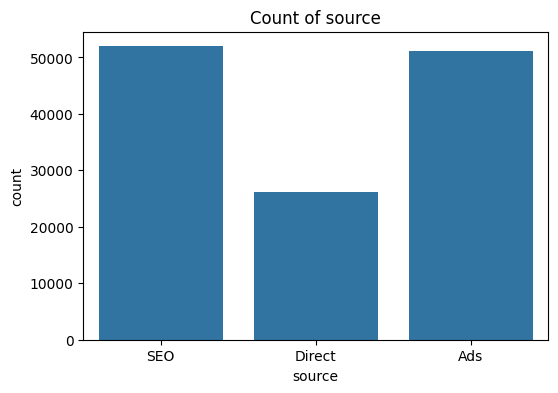

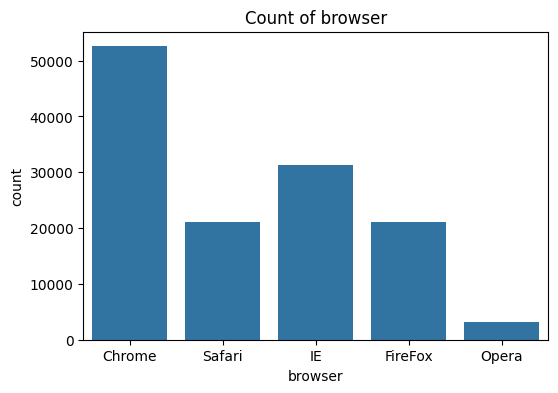

In [8]:
cat_cols = ['sex', 'source', 'browser']
for col in cat_cols:
    plt.figure(figsize=(6,4))
    sns.countplot(x=col, data=fraud_df)
    plt.title(f"Count of {col}")
    plt.show()

In [9]:
# 7️⃣ Time-based features exploration
fraud_df['signup_time'] = pd.to_datetime(fraud_df['signup_time'])
fraud_df['purchase_time'] = pd.to_datetime(fraud_df['purchase_time'])

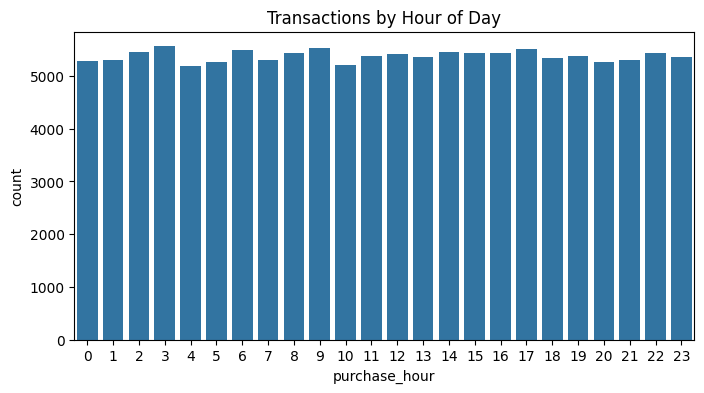

In [10]:
fraud_df['purchase_hour'] = fraud_df['purchase_time'].dt.hour
plt.figure(figsize=(8,4))
sns.countplot(x='purchase_hour', data=fraud_df)
plt.title("Transactions by Hour of Day")
plt.show()


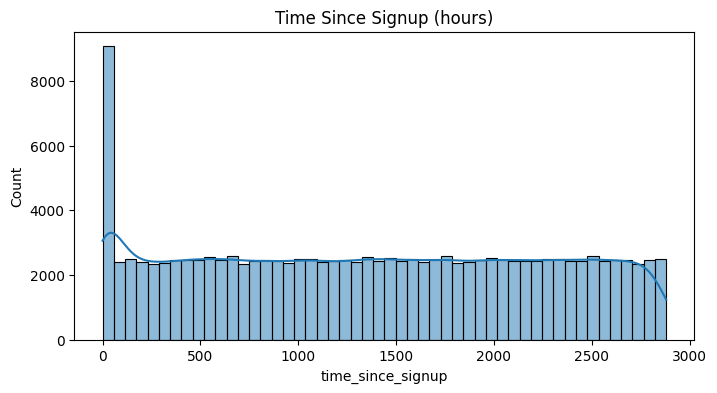

In [11]:
fraud_df['time_since_signup'] = (fraud_df['purchase_time'] - fraud_df['signup_time']).dt.total_seconds() / 3600
plt.figure(figsize=(8,4))
sns.histplot(fraud_df['time_since_signup'], bins=50, kde=True)
plt.title("Time Since Signup (hours)")
plt.show()

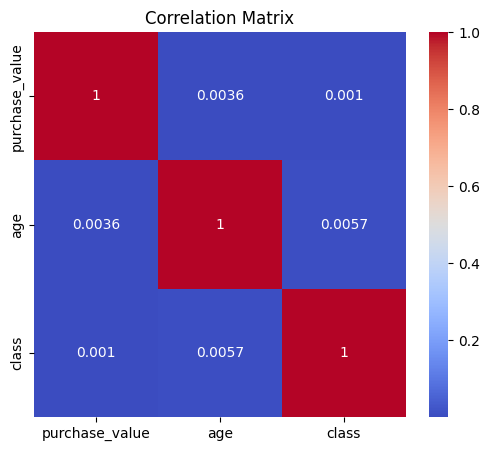

In [12]:
plt.figure(figsize=(6,5))
sns.heatmap(fraud_df[num_cols + ['class']].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

In [13]:

fraud_df.to_csv("../data/processed/fraud_processed.csv", index=False)

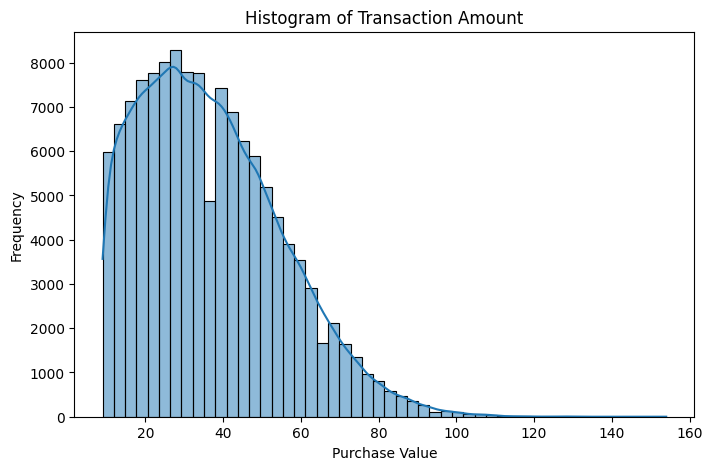

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))
sns.histplot(fraud_df['purchase_value'], bins=50, kde=True)
plt.title("Histogram of Transaction Amount")
plt.xlabel("Purchase Value")
plt.ylabel("Frequency")
plt.show()


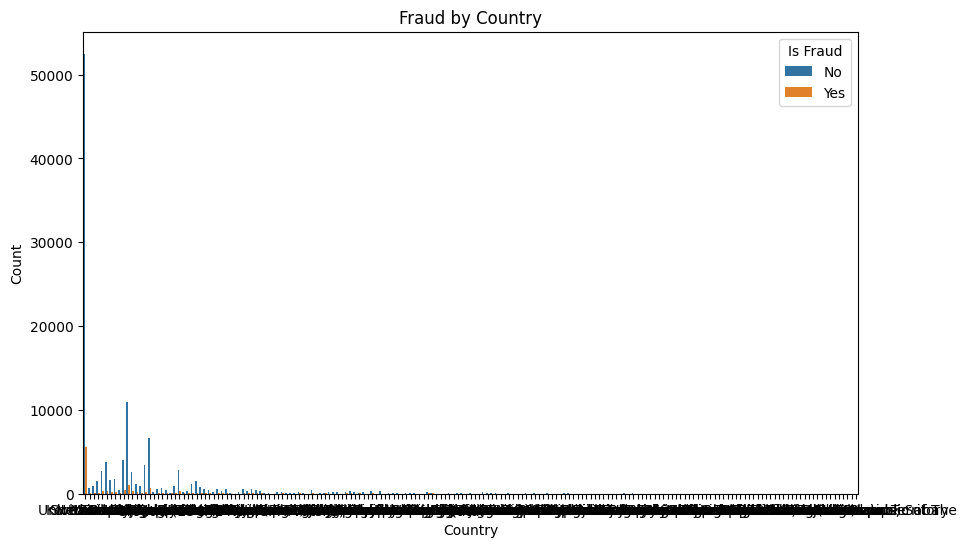

In [15]:
plt.figure(figsize=(10,6))
sns.countplot(x='country', hue='class', data=fraud_df)
plt.title("Fraud by Country")
plt.xlabel("Country")
plt.ylabel("Count")
plt.legend(title="Is Fraud", labels=["No", "Yes"])
plt.show()


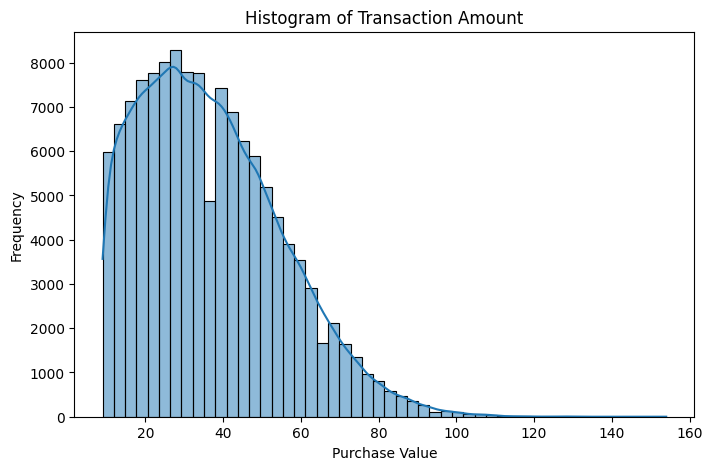

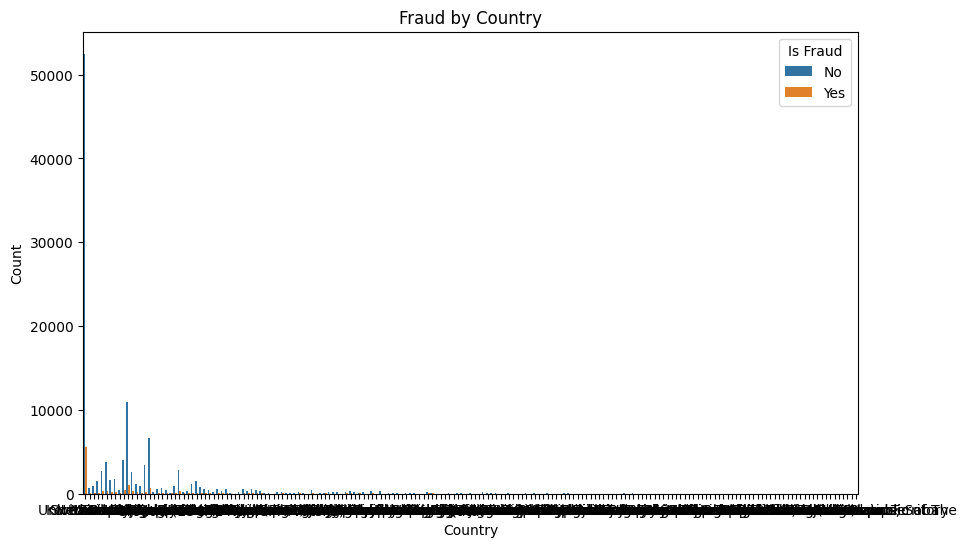

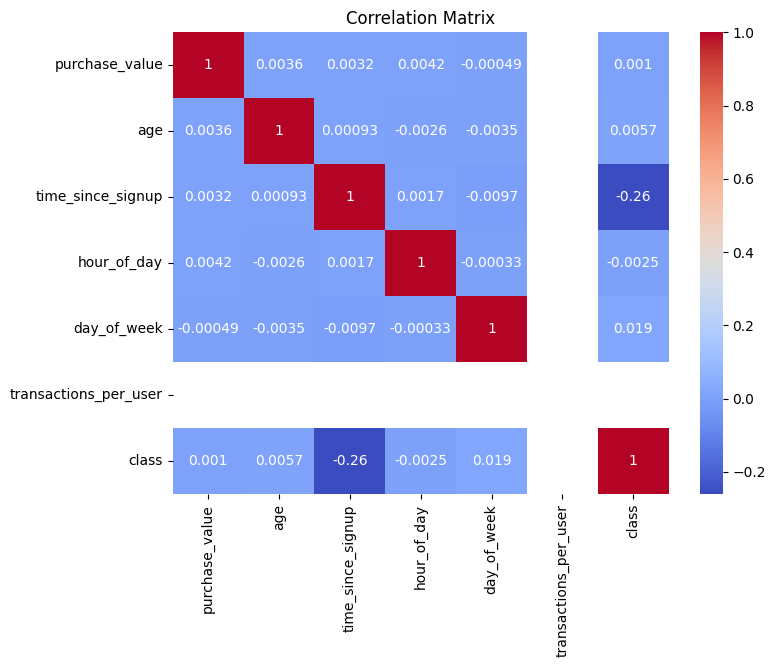

Class distribution before SMOTE:
 class
0    116878
1     12268
Name: count, dtype: int64

Class distribution after SMOTE:
 class
0    93502
1    93502
Name: count, dtype: int64


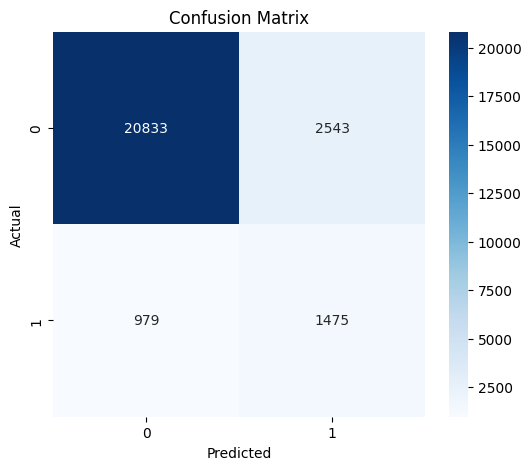

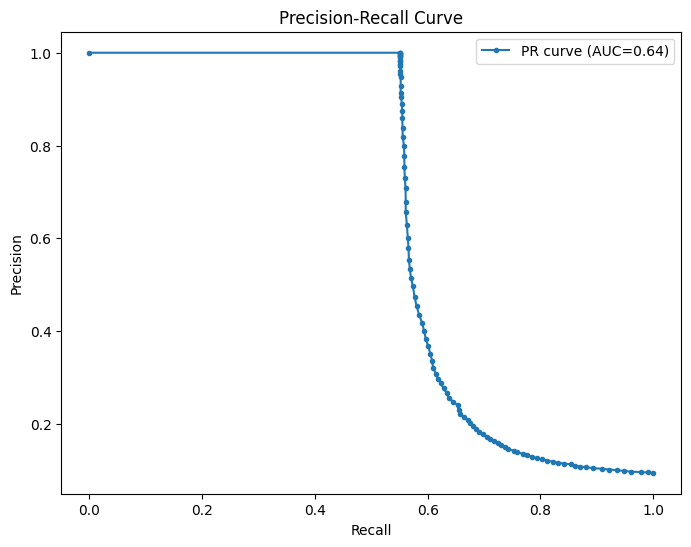


Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.89      0.92     23376
           1       0.37      0.60      0.46      2454

    accuracy                           0.86     25830
   macro avg       0.66      0.75      0.69     25830
weighted avg       0.90      0.86      0.88     25830


Feature Engineering Justifications:

                 Feature                       Description  \
0      time_since_signup  Time between signup and purchase   
1            hour_of_day       Hour of the day of purchase   
2  transactions_per_user   Number of transactions per user   
3         purchase_value                Transaction amount   

                                    Justification  
0                     Fraudsters transact quickly  
1                Fraud may peak at specific hours  
2        Frequent transactions may indicate fraud  
3  High-value transactions more likely fraudulent  


In [16]:
# Fraud Detection Report Helper - Task 1 Evidence

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, precision_recall_curve, auc, classification_report

# -------------------------
# 1. Load Data
# -------------------------
fraud_df = pd.read_csv("../data/raw/fraud_data.csv")
  # change path if needed

# -------------------------
# 2. Basic EDA
# -------------------------
# Histogram of transaction amounts
plt.figure(figsize=(8,5))
sns.histplot(fraud_df['purchase_value'], bins=50, kde=True)
plt.title("Histogram of Transaction Amount")
plt.xlabel("Purchase Value")
plt.ylabel("Frequency")
plt.show()

# Bar chart of fraud by country
plt.figure(figsize=(10,6))
sns.countplot(x='country', hue='class', data=fraud_df)
plt.title("Fraud by Country")
plt.xlabel("Country")
plt.ylabel("Count")
plt.legend(title="Is Fraud", labels=["No", "Yes"])
plt.show()

# Correlation heatmap
num_cols = ['purchase_value', 'age', 'time_since_signup', 'hour_of_day', 'day_of_week', 'transactions_per_user']
plt.figure(figsize=(8,6))
sns.heatmap(fraud_df[num_cols + ['class']].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

# -------------------------
# 3. Handle Class Imbalance
# -------------------------
X = fraud_df[num_cols]
y = fraud_df['class']

# Show class distribution before SMOTE
print("Class distribution before SMOTE:\n", y.value_counts())

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Apply SMOTE
sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

# Show class distribution after SMOTE
print("\nClass distribution after SMOTE:\n", pd.Series(y_train_res).value_counts())

# -------------------------
# 4. Train Model
# -------------------------
model = RandomForestClassifier(random_state=42)
model.fit(X_train_res, y_train_res)

# -------------------------
# 5. Model Evaluation
# -------------------------
# Predictions
y_pred = model.predict(X_test)
y_scores = model.predict_proba(X_test)[:,1]

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=[0,1], yticklabels=[0,1])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, y_scores)
pr_auc = auc(recall, precision)
plt.figure(figsize=(8,6))
plt.plot(recall, precision, marker='.', label=f'PR curve (AUC={pr_auc:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

# Classification Report
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# -------------------------
# 6. Prepare Report Tables
# -------------------------
# Feature Engineering Justifications
feature_justifications = pd.DataFrame({
    "Feature": ['time_since_signup', 'hour_of_day', 'transactions_per_user', 'purchase_value'],
    "Description": ['Time between signup and purchase', 'Hour of the day of purchase', 'Number of transactions per user', 'Transaction amount'],
    "Justification": ['Fraudsters transact quickly', 'Fraud may peak at specific hours', 'Frequent transactions may indicate fraud', 'High-value transactions more likely fraudulent']
})
print("\nFeature Engineering Justifications:\n")
print(feature_justifications)
